In [28]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
import numpy as np

In [29]:
id_information_S1 = pickle.load(open('id_information_S1_file', 'rb'))
id_information_S2 = pickle.load(open('id_information_S2_file', 'rb'))
print(id_information_S1)
print('\n', id_information_S2)

   Participant ID                Emotional sequence Sequence  \
0            C001  [Baseline, Fear, Happy, Neutral]      FHN   
1            C002  [Baseline, Fear, Neutral, Happy]      FNH   
2            C003  [Baseline, Fear, Neutral, Happy]      FNH   
3            C004  [Baseline, Happy, Fear, Neutral]      HFN   
4            C005  [Baseline, Happy, Neutral, Fear]      HNF   
5            C006  [Baseline, Happy, Neutral, Fear]      HNF   
6            C007  [Baseline, Happy, Fear, Neutral]      HFN   
7            C008  [Baseline, Happy, Neutral, Fear]      HNF   
8            C009  [Baseline, Happy, Fear, Neutral]      HFN   
9            C010  [Baseline, Fear, Happy, Neutral]      FHN   
10           C011  [Baseline, Neutral, Fear, Happy]      NFH   
11           C012  [Baseline, Neutral, Happy, Fear]      NHF   
12           C013  [Baseline, Neutral, Happy, Fear]      NHF   
13           C014  [Baseline, Fear, Happy, Neutral]      FHN   
14           C015  [Baseline, Neutral, H

In [30]:
filepath_feat_S1='conditions_features_S1.xlsx'
filepath_feat_S2='conditions_features_S2.xlsx'
fear_S1 = pd.read_excel(filepath_feat_S1,sheet_name='Fear_S1',  usecols=lambda x: 'Unnamed' not in x)
fear_S2 = pd.read_excel(filepath_feat_S2,sheet_name='Fear_S2',  usecols=lambda x: 'Unnamed' not in x)
print(fear_S1.head())
print('\n',fear_S1.head())

   EMG_MF_Activations_N  EMG_MF_Duration_Mean  EMG_MF_Duration_Std  \
0                   441              0.078429             0.032139   
1                   448              0.111904             0.099939   
2                   312              0.087359             0.068515   
3                   456              0.081732             0.042410   
4                   438              0.098436             0.143015   

   EMG_MF_Duration_Var  EMG_MF_Duration_Skew  EMG_MF_Duration_Kurt  \
0             0.001033              1.160139              4.615179   
1             0.009988              0.987720             33.479568   
2             0.004694              0.760078             81.513454   
3             0.001799              1.042141             27.989178   
4             0.020453              0.554545            279.552044   

   EMG_MF_MaxPeakAct_Mean  EMG_MF_MaxPeakAct_Std  EMG_MF_MaxPeakAct_Var  \
0             7105.610061            3051.327814           9.310601e+06   
1       

(29, 181)
(29, 180)


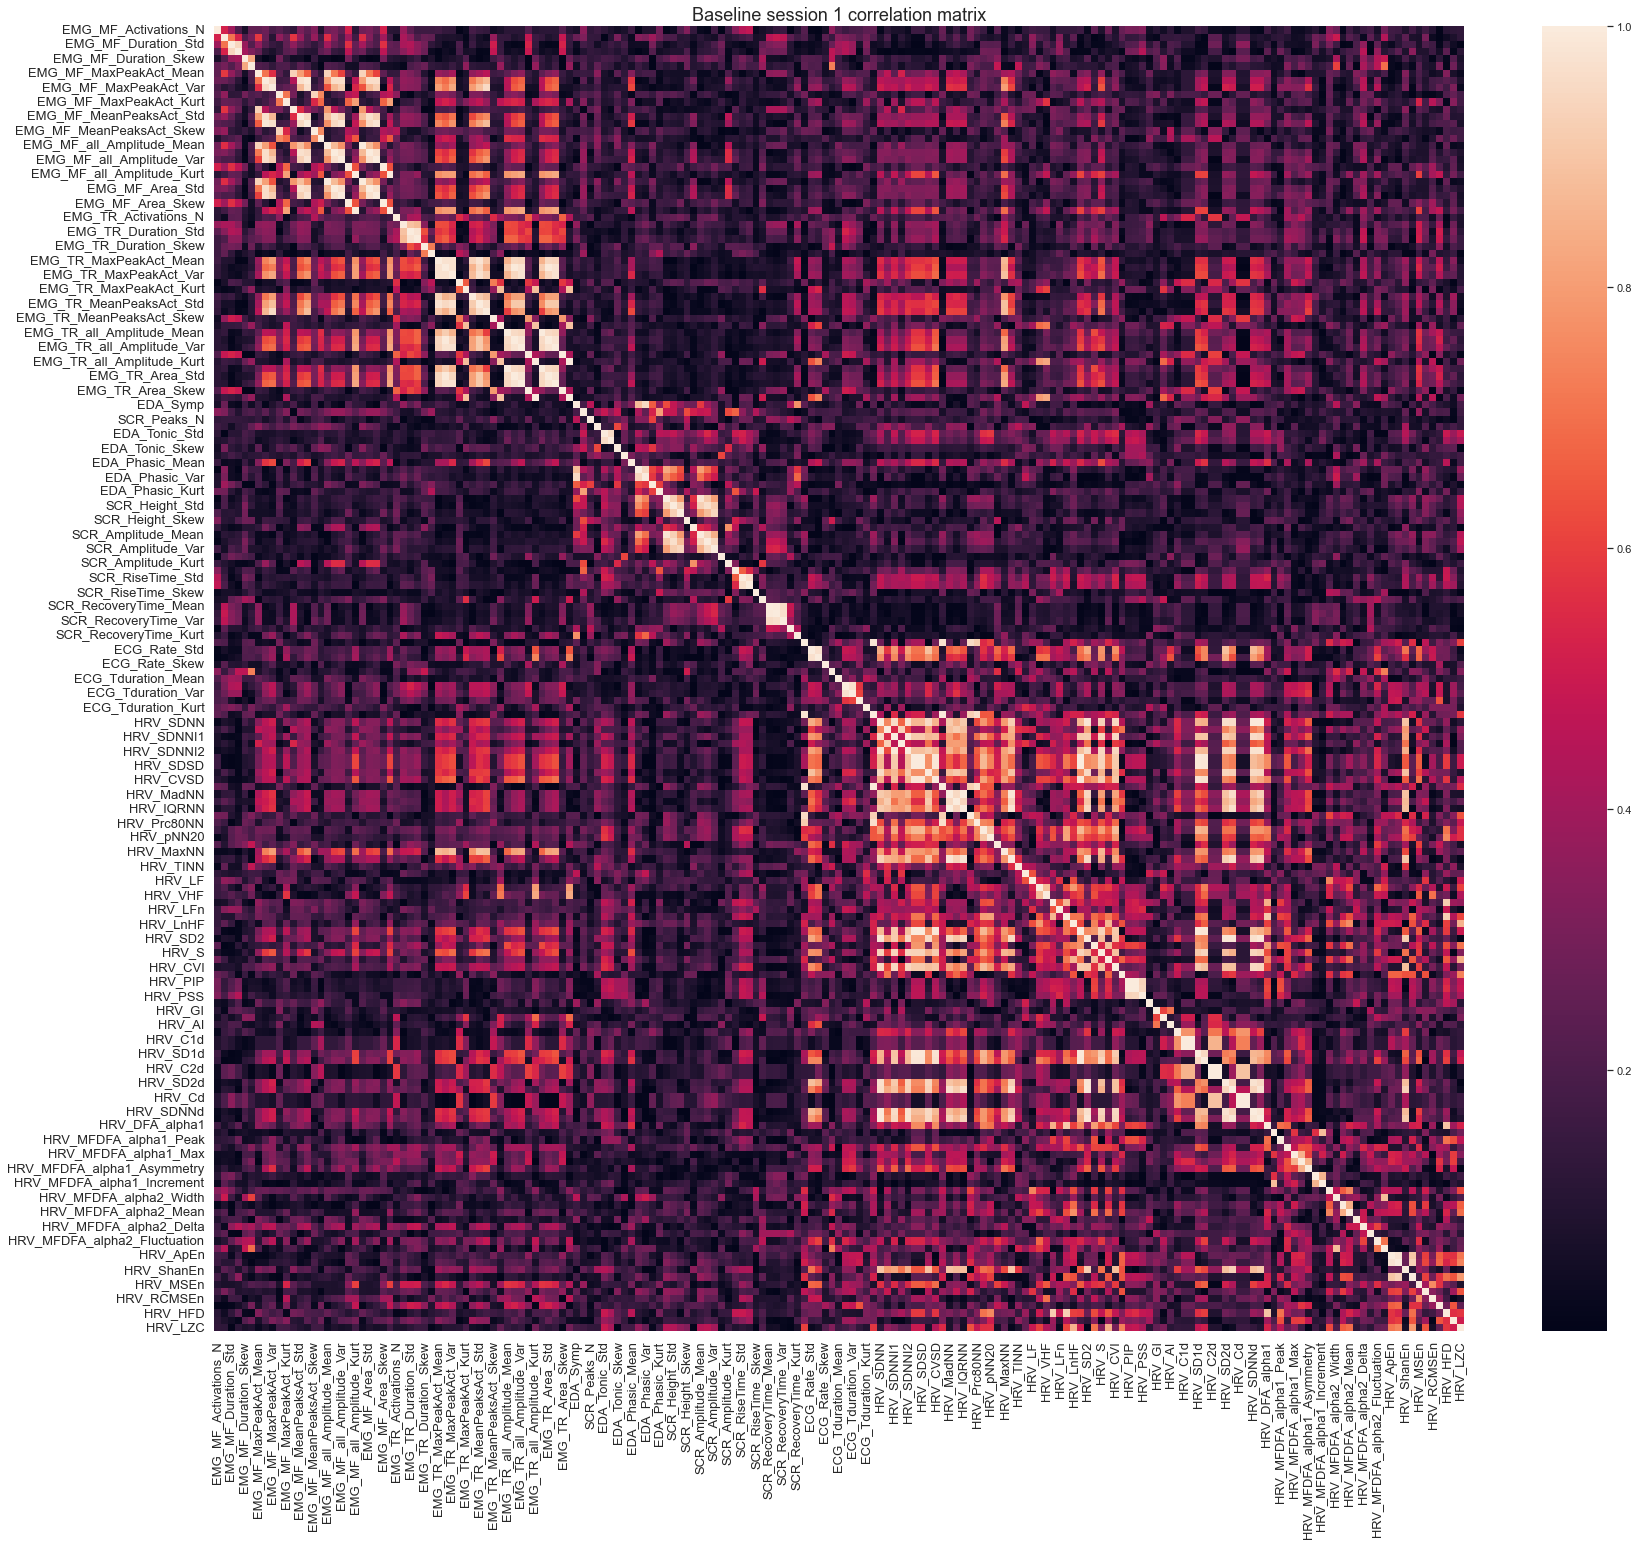

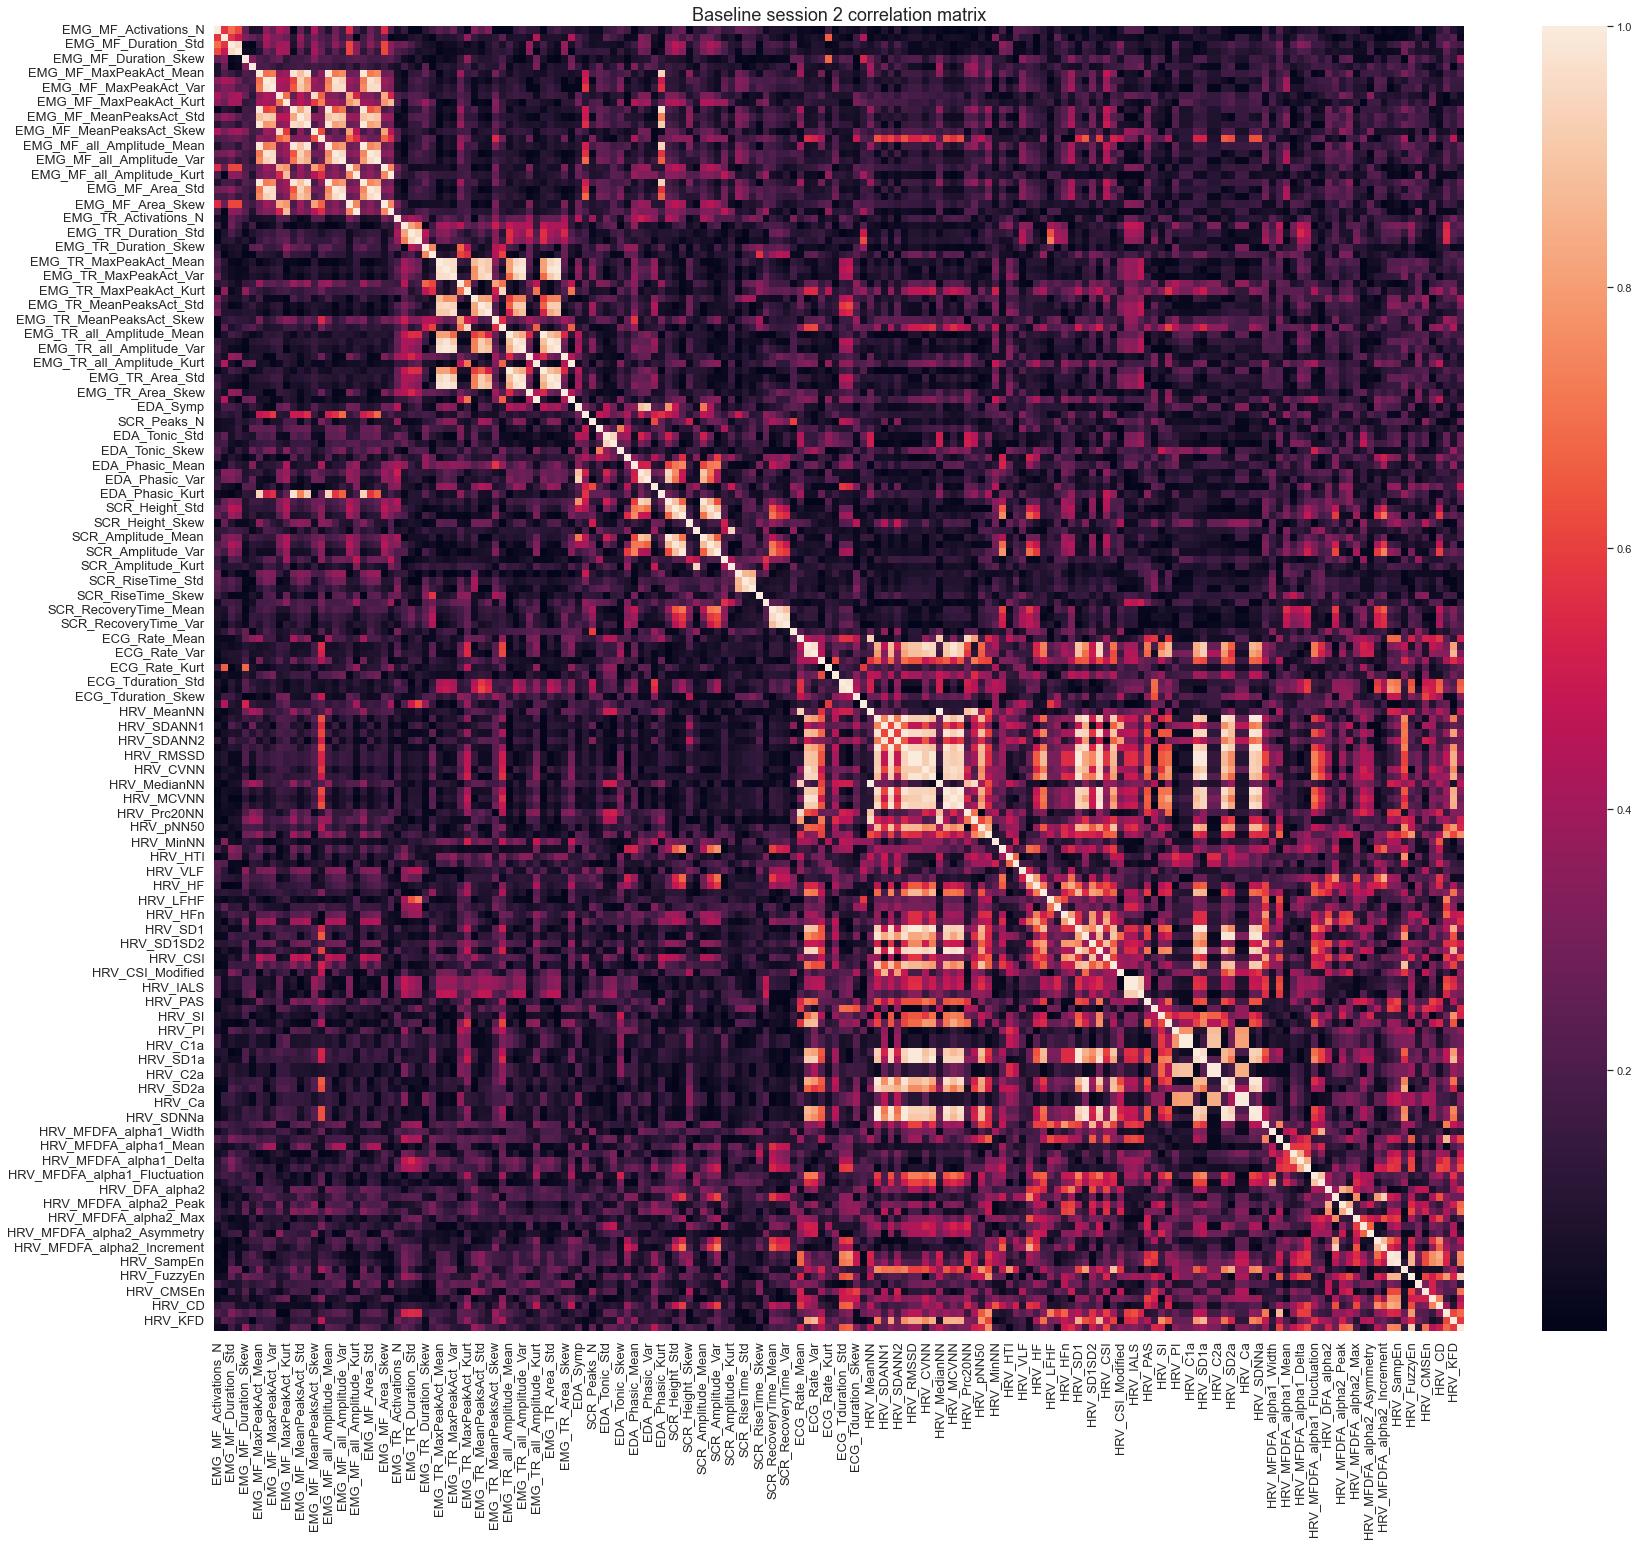

In [31]:
# Tenho de fazer uma análise de remoção de NaN das features da baseline de cada sessão: 
#print(fear_S1.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
#print('\n',fear_S1.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
#incomplete_lines_S1 = fear_S1[fear_S1.isnull().values.any(axis=1)]
#print('\n',fear_S1[fear_S1.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
#print('\n',incomplete_lines_S1.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
#print('\n',fear_S1.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
#print('\n', fear_S1.columns[fear_S1.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:  ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],
#print(fear_S1[ ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF']]),
#print('\n',fear_S1['HRV_SDANN5'].value_counts().sum()) #0
#print('\n',fear_S1['HRV_SDNNI5'].value_counts().sum()) #0
#print('\n',fear_S1['HRV_ULF'].value_counts().sum()) #0

#print(fear_S2.isnull().values.any()) # Verifica se existe algum valor nulo. True -> Existe.
#print('\n',fear_S2.isnull().values.any(axis=1)) # Verifica em que linhas existem valores nulos ou não\n",
#incomplete_lines_S2 = fear_S2[fear_S2.isnull().values.any(axis=1)]
#print('\n',fear_S2[fear_S2.isnull().values.any(axis=1)]) # Fornece as linhas que contêm NaN values\n",
#print('\n',incomplete_lines_S2.shape) #(29, 184) # Todas as linhas têm NaN porque há colunas que tem todos os falores NaN\n",
#print('\n',fear_S2.isnull().values.any(axis=0)) # Verifica em que colunas existem valores nulos ou não\n",
#print('\n', fear_S2.columns[fear_S2.isna().any()].tolist()) # Fornece uma lista com as colunas que têm NaN values\n",
# Colunas que têm valores NaN:   ['SCR_RecoveryTime_Skew', 'HRV_ULF'],
#print(fear_S2[  ['SCR_RecoveryTime_Skew', 'HRV_ULF']]),
#print('\n',fear_S2['SCR_RecoveryTime_Skew'].value_counts().sum()) #0
#print('\n',fear_S2['HRV_ULF'].value_counts().sum()) #0

# Dado os valores NaN obtidos nas ditas colunas a melhor forma é remover estas features:,
fear_S1 = fear_S1.drop( ['HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF'],axis=1)
print(fear_S1.shape) 
fear_S2 = fear_S2.drop( ['SCR_RecoveryTime_Skew','HRV_SDANN5','HRV_SDNNI5', 'HRV_ULF'],axis=1)
print(fear_S2.shape) 

cor_b_S1 = abs(fear_S1.corr())
cor_b_S2 = abs(fear_S2.corr())

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(cor_b_S1)
b_S1.set_title('Fear session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(cor_b_S2)
b_S2.set_title('Fear session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [32]:
cor_b_S1.values
corr_mean_S1 = np.mean(cor_b_S1, axis=0)
print(corr_mean_S1)

cor_b_S2.values
corr_mean_S2 = np.mean(cor_b_S2, axis=0)
print(corr_mean_S2)

EMG_MF_Activations_N    0.154084
EMG_MF_Duration_Mean    0.192645
EMG_MF_Duration_Std     0.170312
EMG_MF_Duration_Var     0.155545
EMG_MF_Duration_Skew    0.155064
                          ...   
HRV_RCMSEn              0.204114
HRV_CD                  0.228592
HRV_HFD                 0.266604
HRV_KFD                 0.207120
HRV_LZC                 0.238317
Length: 181, dtype: float64
EMG_MF_Activations_N    0.126043
EMG_MF_Duration_Mean    0.130943
EMG_MF_Duration_Std     0.166280
EMG_MF_Duration_Var     0.136851
EMG_MF_Duration_Skew    0.148885
                          ...   
HRV_RCMSEn              0.214089
HRV_CD                  0.241737
HRV_HFD                 0.266242
HRV_KFD                 0.296869
HRV_LZC                 0.268587
Length: 180, dtype: float64


EMG_MF_Activations_N    EMG_MF_Duration_Mean
EMG_MF_Duration_Mean     EMG_MF_Duration_Std
EMG_MF_Duration_Std      EMG_MF_Duration_Var
EMG_MF_Duration_Var      EMG_MF_Duration_Std
EMG_MF_Duration_Skew    EMG_MF_Duration_Kurt
                                ...         
HRV_RCMSEn                          HRV_MSEn
HRV_CD                            HRV_SampEn
HRV_HFD                              HRV_HFn
HRV_KFD                          HRV_FuzzyEn
HRV_LZC                             HRV_LnHF
Length: 181, dtype: object

 EMG_MF_Duration_Std

 0.5251267597177273


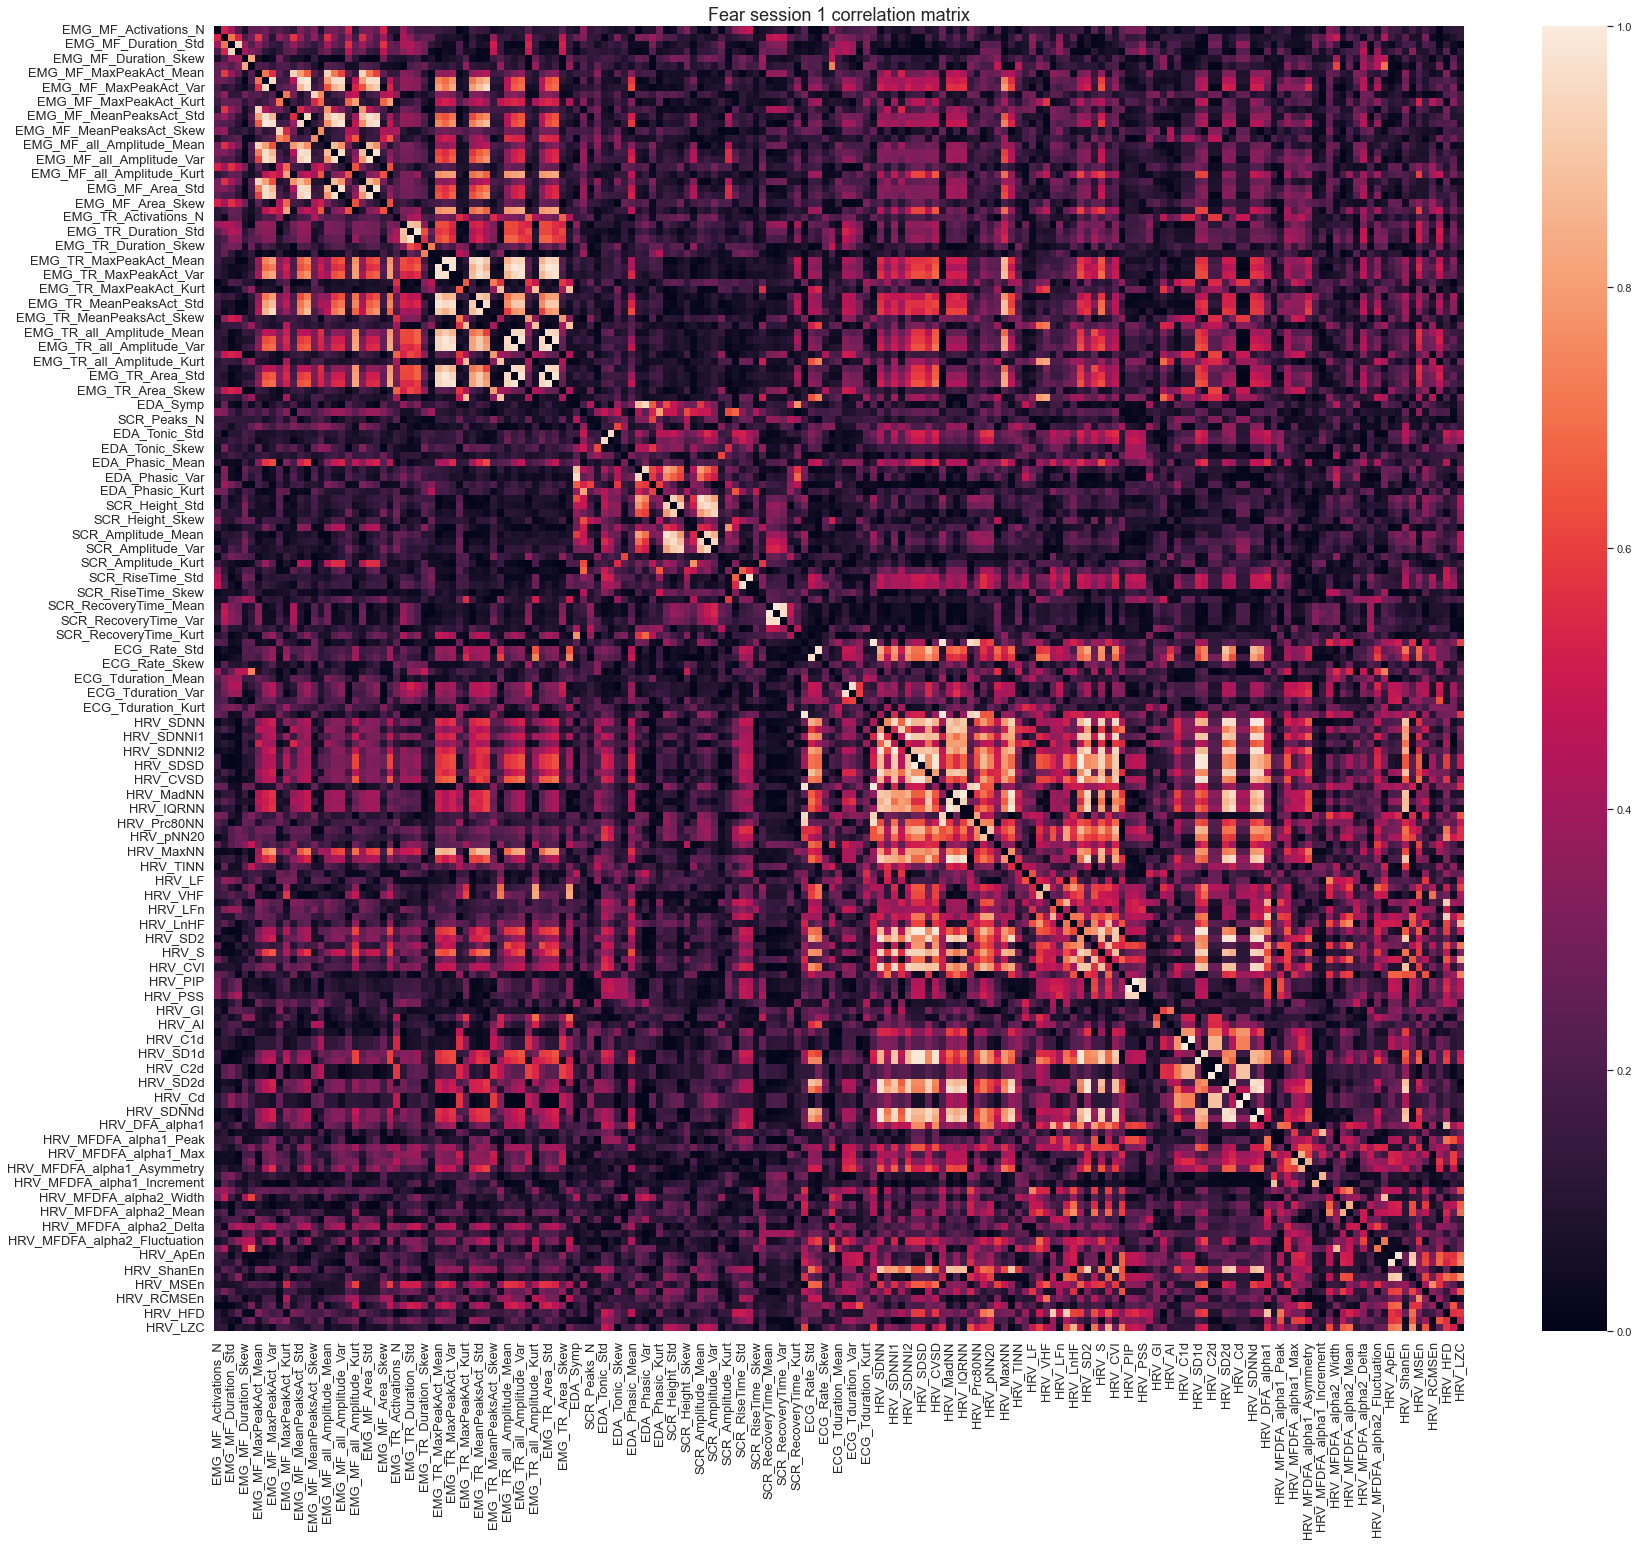

EMG_MF_Activations_N      EMG_MF_Duration_Std
EMG_MF_Duration_Mean            ECG_Rate_Kurt
EMG_MF_Duration_Std       EMG_MF_Duration_Var
EMG_MF_Duration_Var       EMG_MF_Duration_Std
EMG_MF_Duration_Skew            ECG_Rate_Kurt
                                ...          
HRV_RCMSEn                           HRV_ApEn
HRV_CD                               HRV_ApEn
HRV_HFD                 HRV_MFDFA_alpha1_Peak
HRV_KFD                                 HRV_S
HRV_LZC                           HRV_FuzzyEn
Length: 180, dtype: object

 ECG_Rate_Kurt

 0.5773071297886083


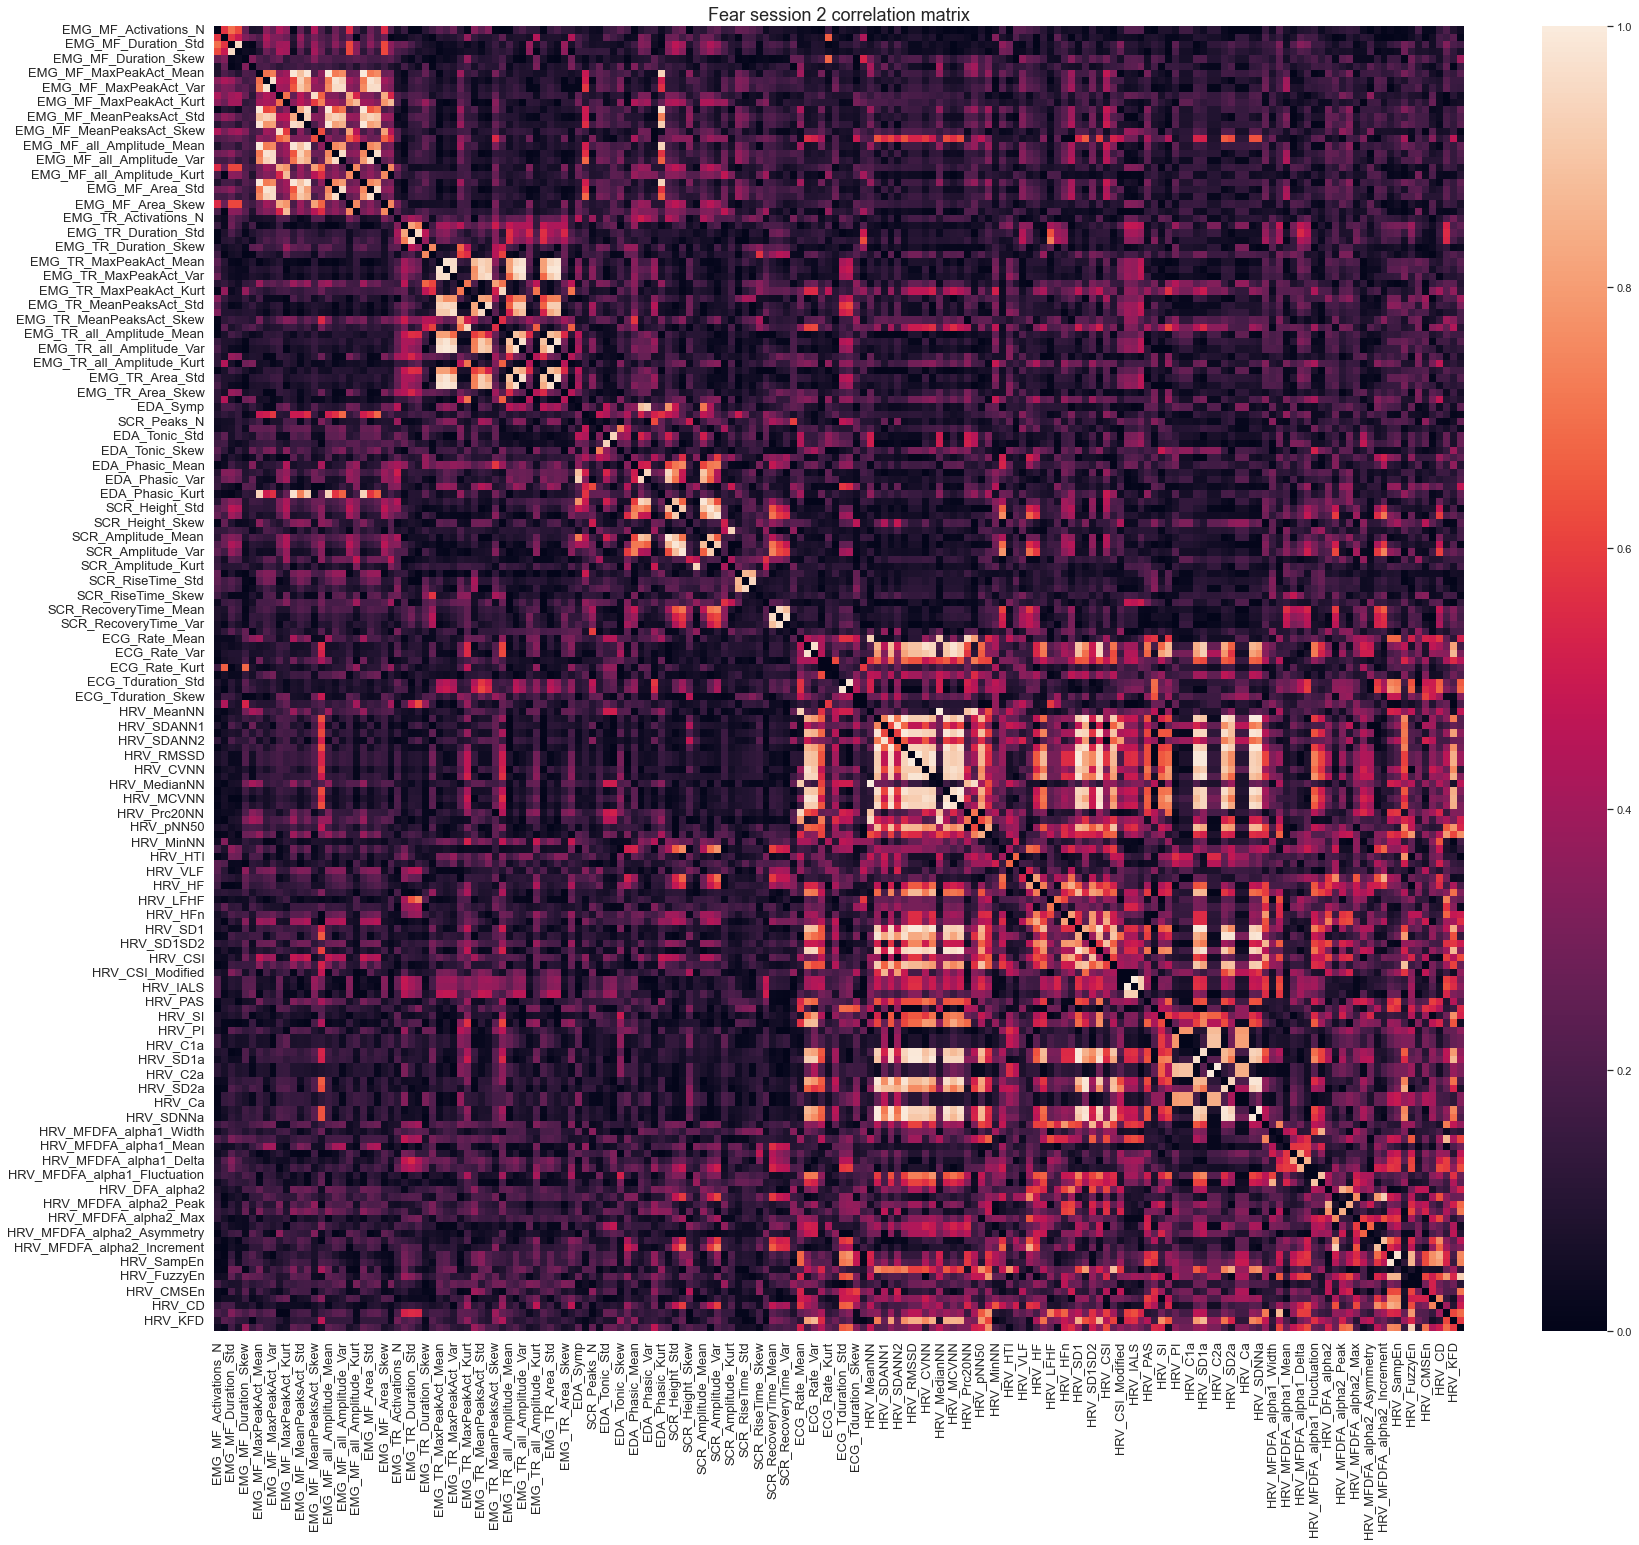

In [33]:
new_cor_b_S1 = cor_b_S1.replace(1,0)
a = new_cor_b_S1.idxmax()
print(a)
print('\n',a[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S1.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S1=sns.heatmap(new_cor_b_S1)
b_S1.set_title('Fear session 1 correlation matrix',fontsize=18)
b_S1.tick_params(labelsize=13)
plt.show()


new_cor_b_S2 = cor_b_S2.replace(1,0)
a_S2 = new_cor_b_S2.idxmax()
print(a_S2)
print('\n',a_S2[1])
#print(new_cor_b_S1)
print('\n',new_cor_b_S2.iloc[1]['EMG_MF_Activations_N'])

sns.set(rc={'figure.figsize':(28,24)})
b_S2=sns.heatmap(new_cor_b_S2)
b_S2.set_title('Fear session 2 correlation matrix',fontsize=18)
b_S2.tick_params(labelsize=13)
plt.show()

In [34]:
def selecting_feat (data,new_cor,a,threshold):
    deleted_features_list = []
    
        # Between all combinations find the maximum value and save the feature of row and the feature of column
    corr_value=0
    for i in range(0,len(a)):
        correlation = new_cor.iloc[i][a[i]]
        #print(correlation)
        #if corr_value<correlation:
           # corr_value=correlation
           # print(corr_value)
        if correlation >= threshold:
            feat1=new_cor.columns[i] #row of dataframe
            feat2=a[i] #column
                #Para teste fiz o print de feat1 e feat2 para depois ver a média de correlaçoes de cada uma e confirmar que está correto o funcionamento da função
            #print(feat1) 
            #print(feat2)
                 # Acessing the excel with the p-values of ANOVA results and delete the feature with the biggest p-value
            if corr_mean_S1[feat1]>=corr_mean_S1[feat2]:
                deleted_feat=feat1
            else:
                deleted_feat=feat2
            if deleted_feat not in deleted_features_list:
                deleted_features_list.append(deleted_feat)
                
    
        # Calculate new correlation matrix
        #cor = abs(data.corr())
        #new_cor = cor.replace(1,0)
        #a = new_cor.idxmax()
    # Delete the column and row of the removed feature 
    for feat in deleted_features_list:
        print(feat)
        data = data.drop(columns=feat)   

    n_del=len(deleted_features_list)
    n_rem=len(new_cor.columns)
    return n_del, n_rem, data, deleted_features_list

n_del, n_rem, data, deleted_features_list = selecting_feat (fear_S1,new_cor_b_S1,a,0.50)

n_del_S2, n_rem_S2, data_S2, deleted_features_list_S2 = selecting_feat (fear_S2,new_cor_b_S2,a_S2,0.50)

EMG_MF_Duration_Mean
EMG_MF_Duration_Std
EMG_MF_Duration_Kurt
EMG_MF_MaxPeakAct_Mean
EMG_MF_MaxPeakAct_Std
EMG_MF_MaxPeakAct_Var
EMG_MF_MaxPeakAct_Skew
EMG_MF_all_Amplitude_Kurt
EMG_MF_MeanPeaksAct_Kurt
EMG_MF_all_Amplitude_Std
EMG_MF_MeanPeaksAct_Var
EMG_MF_MaxPeakAct_Kurt
EMG_TR_all_Amplitude_Var
EMG_MF_Area_Std
EMG_TR_Activations_N
EMG_TR_Duration_Mean
EMG_TR_Duration_Var
EMG_TR_Duration_Skew
EMG_TR_MaxPeakAct_Mean
EMG_TR_MaxPeakAct_Std
EMG_TR_MaxPeakAct_Var
EMG_TR_MaxPeakAct_Skew
EMG_TR_all_Amplitude_Kurt
EMG_TR_MeanPeaksAct_Std
EMG_TR_all_Amplitude_Skew
EMG_TR_all_Amplitude_Std
EMG_TR_Area_Var
EMG_TR_Area_Skew
EMG_TR_Area_Kurt
EDA_Phasic_Var
EDA_SympN
SCR_Peaks_N
EDA_Tonic_Skew
EDA_Tonic_Std
EDA_Tonic_Kurt
HRV_S
EDA_Phasic_Std
EDA_Symp
SCR_Height_Mean
SCR_Amplitude_Std
SCR_Amplitude_Var
SCR_Amplitude_Kurt
SCR_RiseTime_Std
SCR_RecoveryTime_Std
SCR_RecoveryTime_Var
SCR_RecoveryTime_Kurt
HRV_MeanNN
ECG_Rate_Std
HRV_MFDFA_alpha2_Increment
ECG_Tduration_Std
HRV_CD
HRV_VLF
HRV_SDNN
HRV_

In [35]:
print(n_del)
print(deleted_features_list)
print(len(a))

print(n_del_S2)
print(deleted_features_list_S2)
print(len(a_S2))

97
['EMG_MF_Duration_Mean', 'EMG_MF_Duration_Std', 'EMG_MF_Duration_Kurt', 'EMG_MF_MaxPeakAct_Mean', 'EMG_MF_MaxPeakAct_Std', 'EMG_MF_MaxPeakAct_Var', 'EMG_MF_MaxPeakAct_Skew', 'EMG_MF_all_Amplitude_Kurt', 'EMG_MF_MeanPeaksAct_Kurt', 'EMG_MF_all_Amplitude_Std', 'EMG_MF_MeanPeaksAct_Var', 'EMG_MF_MaxPeakAct_Kurt', 'EMG_TR_all_Amplitude_Var', 'EMG_MF_Area_Std', 'EMG_TR_Activations_N', 'EMG_TR_Duration_Mean', 'EMG_TR_Duration_Var', 'EMG_TR_Duration_Skew', 'EMG_TR_MaxPeakAct_Mean', 'EMG_TR_MaxPeakAct_Std', 'EMG_TR_MaxPeakAct_Var', 'EMG_TR_MaxPeakAct_Skew', 'EMG_TR_all_Amplitude_Kurt', 'EMG_TR_MeanPeaksAct_Std', 'EMG_TR_all_Amplitude_Skew', 'EMG_TR_all_Amplitude_Std', 'EMG_TR_Area_Var', 'EMG_TR_Area_Skew', 'EMG_TR_Area_Kurt', 'EDA_Phasic_Var', 'EDA_SympN', 'SCR_Peaks_N', 'EDA_Tonic_Skew', 'EDA_Tonic_Std', 'EDA_Tonic_Kurt', 'HRV_S', 'EDA_Phasic_Std', 'EDA_Symp', 'SCR_Height_Mean', 'SCR_Amplitude_Std', 'SCR_Amplitude_Var', 'SCR_Amplitude_Kurt', 'SCR_RiseTime_Std', 'SCR_RecoveryTime_Std', 'SCR

In [36]:
data.shape
print(data)
filepath_feat='Fear_features_S1.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data.to_excel(writer, sheet_name='Fear_S1', na_rep='nan')
writer.save()

data_S2.shape
print(data_S2)
filepath_feat='Fear_features_S2.xlsx'
writer=pd.ExcelWriter(filepath_feat, engine='xlsxwriter')
data_S2.to_excel(writer, sheet_name='Fear_S2', na_rep='nan')
writer.save()

    EMG_MF_Activations_N  EMG_MF_Duration_Var  EMG_MF_Duration_Skew  \
0                    441             0.001033              1.160139   
1                    448             0.009988              0.987720   
2                    312             0.004694              0.760078   
3                    456             0.001799              1.042141   
4                    438             0.020453              0.554545   
5                    186             0.097445              1.044023   
6                    450             0.042848              0.601169   
7                    297             0.244832              1.001925   
8                    220             0.070442              0.554067   
9                    312             0.035227              0.989003   
10                   240             0.195667              0.674901   
11                   255             0.106211              0.709815   
12                   408             0.016994              0.626718   
13    